> 버전 정보 python 3.7
>
> konlpy: 0.5.2

In [6]:
#라이브러리 설치 - 해당 라이브러리가 없다면 아래 코드를 이용해서 설치해주시기 바랍니다.

#!pip install konlpy
###Mecab 라이브러리를 설치가 복잡하므로 설치할때는 해당 블로그를 참조하여 다운로드 바랍니다
#https://cleancode-ws.tistory.com/97 ->여기 과정을 수행한뒤에
#https://konlpy.org/ko/v0.5.2/install/ -> 여기 과정을 수행하고 아래 코드 입력
#!pip install --upgrade pip
#!pip install JPype1-0.5.7-cp27-none-win_amd64.whl
###


> 버전 정보 
>
> konlpy : 0.5.2
>
> re : 2.2.1
>
> wordcloud : 1.8.0

In [3]:
import konlpy.tag
mecab = konlpy.tag.Mecab(dicpath=r"C:\mecab\mecab-ko-dic")
okt = konlpy.tag.Okt()

In [4]:
import pandas as pd
import re

In [5]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7A00-B21C

 C:\Users\user\Desktop\프로젝트\최종제출_PAXBD팀\PAXBD 코드와 데이터\[PAXBD]텍스트마이닝\소멸위험지역 크롤링데이터 및 워드클라우드\중앙일보 지방 데이터\워드클라우드 로고작업 전 디렉터리

2020-09-17  오전 02:09    <DIR>          .
2020-09-17  오전 02:09    <DIR>          ..
2020-09-17  오전 01:00    <DIR>          .ipynb_checkpoints
2020-06-03  오후 08:16         2,145,272 font.ttf
2020-08-26  오후 07:15           145,512 강진군 워드클라우드.png
2020-08-26  오후 07:15           156,661 강화군 워드클라우드.png
2020-08-26  오후 07:17           156,105 거창군 워드클라우드.png
2020-08-26  오후 07:18           155,578 고령군 워드클라우드.png
2020-08-26  오후 07:18           160,880 고성군 워드클라우드.png
2020-08-26  오후 07:19           150,464 고창군 워드클라우드.png
2020-08-26  오후 07:20           158,434 고흥군 워드클라우드.png
2020-08-26  오후 07:20           149,962 곡성군 워드클라우드.png
2020-08-26  오후 07:20           157,554 괴산군 워드클라우드.png
2020-08-26  오후 07:21           153,279 구례군 워드클라우드.png
2020-08-26  오후 09:09           159,980 군위군 워드클라우드.png
2020-08-26  오후 09:10           153,258 금산군 워드클라우

In [8]:
중앙 = pd.read_csv('중앙일보화성시.csv', encoding = "utf-8")
경향 = pd.read_csv('경향신문화성시.csv')
df = pd.concat([중앙, 경향], axis = 0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 209
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  528 non-null    int64 
 1   index       528 non-null    int64 
 2   기사 제목       528 non-null    object
 3   작성 시간       528 non-null    object
 4   기사 내용       528 non-null    object
 5   지역          528 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.9+ KB


In [10]:
df.isnull().sum()

Unnamed: 0    0
index         0
기사 제목         0
작성 시간         0
기사 내용         0
지역            0
dtype: int64

In [11]:
# Text Cleaning
def cleaning(x):
    x = re.sub("[^\w\s]", " ", x)
    x = re.sub("[\n\r]", " ", x)
    return re.sub("[\xa0]", " ", x)

In [12]:
df["기사 내용"] = df["기사 내용"].apply(cleaning)

In [13]:
df.head()

,Unnamed: 0,index,기사 제목,작성 시간,기사 내용,지역
0,0,379,장윤규 건축이 삶을 묻다 파도소리 품은 미술관 자연동굴 닮은 온천장,2020.07.31,코로나19와 마음을 치유하는 건축 21세기 건축은 자연에 내재된 치...,화성시
1,1,380,임종석 남북교류사업 도시로 고성군 선정 北 도시와 항구적 협력,2020.07.29,29일 강원 고성군청 대회실에서 열린 고성군과 남북경제문화협력재단 경문협 ...,화성시
2,2,381,미군 전용 항공기 승무원 화성시서 코로나19 확진,2020.07.28,주한미군 5 6번째 코로나19 확진자 발생 이 사진은 기사와 직접적 연...,화성시
3,3,382,바다 나간 배가 길에 걸렸다 화성 제부도 바닷길 막은 요트,2020.07.25,25일 오전 제부도 바닷길에 얹혀 있는 사고 요트 사진 평택해양경찰서 ...,화성시
4,4,383,강남인데 분양가 2억도 안돼 땅 없는 아파트가 진짜 로또,2020.07.25,서울 강남보금자리주택지구 토지임대부를 포함해 다양한 형태의 주택이 공급됐...,화성시


In [14]:
# 일반적으로 지역이름, 속해있는 '도'를 불용어로 정의해줬음

stopword_list = ["경기","경기도", "강원도", "강원", "전남", "전북", "충남", "충북", "경남", "경북", "인천", "인천시", "인천광역시", "대전광역시", "대전",
                 "대구", "대구광역시", "울산", "울산광역시", "제주", "부산광역시", "부산", "광역시", "화성시", "화성", "지역"]

# 불용어 제거 함수
def remove_stopwords(words):
    result = []
    for w in words:
        if w not in stopword_list:
            result.append(w)
    return result
                
# 한 글자 단어 제거 함수
def remove_onewords(words):
    result = []
    for w in words:
        if len(w) != 1:
            result.append(w)
    return result

In [15]:
# 최종 함수 생성 (토큰화 + 불용어제거)

data_list = []

def tokenizing_and_cleaning(raw_text):
    
    # 명사 단위로 토큰화 하는 과정
    token = mecab.nouns(raw_text)
    
    # 불용어 제거 
    stopwords = remove_stopwords(token)

    # 한글자 단어 제거 
    meaningful_words = remove_onewords(stopwords)
    
    data_list.append(meaningful_words)

In [16]:
# 함수 적용

df["기사 내용"].apply(tokenizing_and_cleaning)

# data_list 리스트 안의 단어들로 토큰만 들어있는 리스트를 만든다.

word_list = []

for i in range(len(data_list)):
    word_list.extend(data_list[i])

In [17]:
# 데이터프레임으로 만들어준다.
all_token = pd.DataFrame(word_list, columns = ["토큰"])
all_token.head()

,토큰
0,코로나
1,마음
2,치유
3,건축
4,세기


In [18]:
# 상위 빈도순 100개
from collections import Counter

c = Counter(all_token["토큰"])
most_word = c.most_common(100)

In [19]:
# 데이터프레임으로 만들어준다.
most_token = pd.DataFrame(most_word, columns = ["단어 토큰", "빈도 수"])
most_token

,단어 토큰,빈도 수
0,사건,1772
1,경찰,969
2,살인,800
3,수사,693
4,당시,641
...,...,...
95,재심,174
96,사고,171
97,주행,170
98,경제,168


In [20]:
word_dict = dict(c.most_common(100))

In [23]:
#! pip install wordcloud

In [24]:
# 미설치시 ! pip install wordcloud
from wordcloud import WordCloud

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')

In [25]:
from PIL import Image
import numpy as np
import random

icon = Image.open('마스크.png')
mask = Image.new("RGB", icon.size, (400,400,400))
mask.paste(icon,icon)
mask = np.array(mask)
cmap = plt.cm.cividis

# 아래의 코드는 이미지 본 색상을 따라가는 코드입니다. (그림 색상을 그대로 가져와서 사용해야 할 때 ex.태극 문양)
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

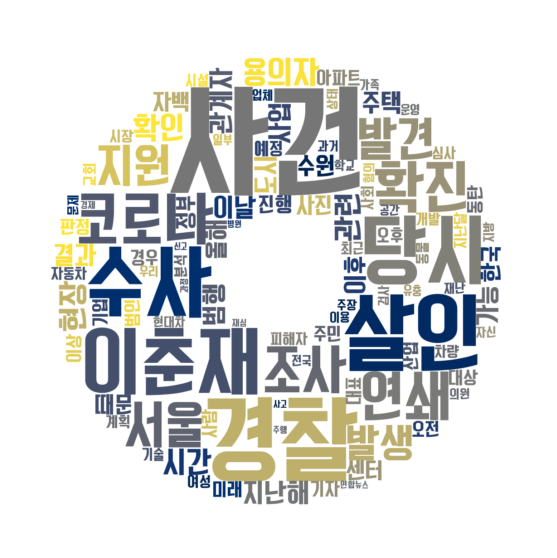

In [26]:
# 워드 클라우드 출력하기
wc = WordCloud(font_path = 'font.ttf',      # 폰트 지정 (본인이 원하는 폰트를 현재 디렉토리로 복붙하셔야합니다.) C:\Windows\Fonts에 있는 폰트를 복붙, 영어로 글꼴이름 변경
               mask = mask,                 # 위에서 만들어준 마스크 지정
               background_color = "white",  # 배경색 지정
               max_font_size = 250,         # 폰트사이즈지정 (그림을 구체화 시킬 때 사용합니다. 적당한 선을 본인 그림에 맞게 찾으셔야합니다.)
               margin = 0,                  # 토큰 사이사이의 빈 칸 크기 지정 (0이 가장 빼곡하므로 좋습니다.) 
               colormap = cmap)             # 위에서 지정한 plt의 colormap 지정 (본 워드클라우드는 이미지의 색을 따라가게 해놨으므로 적용되지 않습니다.)

cloud = wc.generate_from_frequencies(word_dict) # 빈도수를 활용하여 워드클라우드에 적용

plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation = "bilinear" )
plt.axis("off")
plt.show()

In [721]:
#cloud.to_file('화성시 워드클라우드.png')